# Census Income :
    
Project Description :
    
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, 
Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100)
&& (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
    
Description of fnlwgt (final weight):
    
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian 
non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. 
We use 3 sets of controls. These are:
    
1.A single cell estimate of the population 16+ for each state.

2.Controls for Hispanic Origin by age and sex.

3.Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back 
to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" 
of any specified socio-economic characteristics of the population. People with similar demographic characteristics should 
have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is 
actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within 
state.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [3]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
# Check the rows and columns of Dataset :

df.shape

(32560, 15)

In [5]:
# information of dataset :

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# Checking the missing value :

df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

EDA - Expolatory Data Analysis and Data Visualization :

In [7]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

1. Age — The age of an individual, this ranges from 17 to 90.

2. Workclass — The class of work to which an individual belongs.

3. Fnlwgt — The weight assigned to the combination of features(an estimate of how many people belong to this set of combination)

4. Education — Highest level of education

5. Education_num — Number of years for which education was taken

6. Marital_Status — Represents the category assigned on the basis of marriage status of a person

7. Occupation — Profession of a person

8. Relationship — Relation of the person in his family

9. Race — Origin background of a person

10. Sex — Gender of a person

11. Capital_gain — Capital gained by a person

12. Capital_loss — Loss of capital for a person

13. Hours_per_week — Number of hours for which an individual works per week

14. Native_Country — Country to which a person belongs

15. Income — The target variable, which predicts if the income is higher or lower than 50K$



In [8]:
df.describe(include = 'object')

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
count,32560,32560,32560,32560,32560,32560,32560,32560,32560
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27815,21789,29169,24719


In [9]:
# Symetrical dataset :

df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


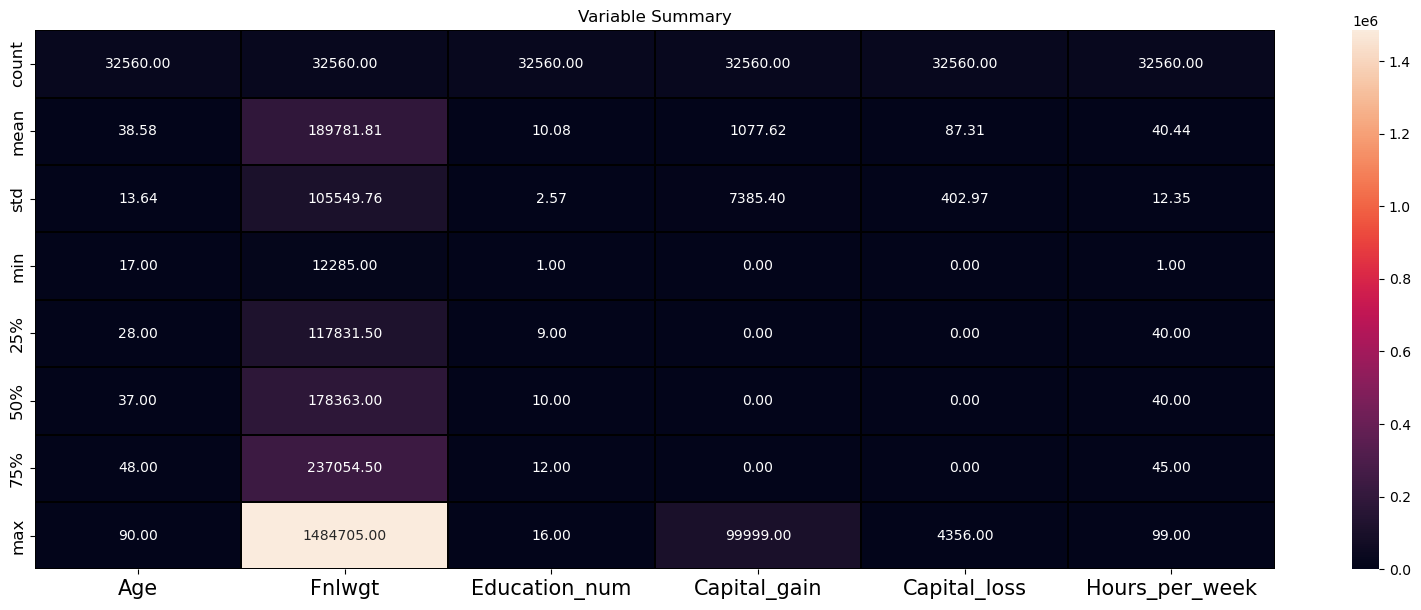

In [10]:
#  Using the heatmap :

plt.figure(figsize = (20,7))
sns.heatmap(df.describe(), annot = True, linewidth = 0.2, linecolor = 'black', fmt = '0.2f')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 12)
plt.title('Variable Summary')
plt.show()

Following observations are made in this step –

- The age column has a range of 17 to 90.

- The fnlwgt column has a minimum value of 12205 and maximum value of 1484705

- The education number has a range of 1 to 16

- The capital gain starts from 0 and ends at 99999

- The capital loss starts at 0 and ends at 4356

- Hours per week range between 1–99.

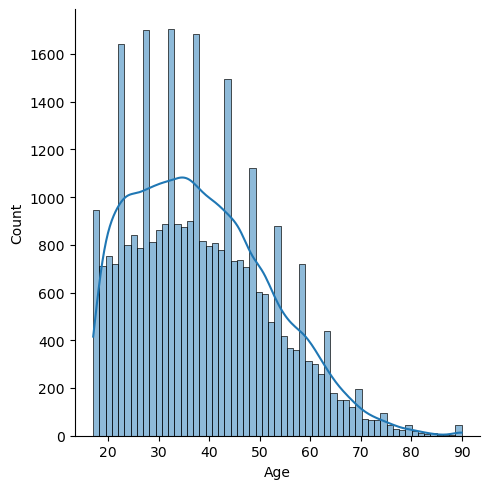

In [11]:
# Using distribution plot of Age :

sns.displot(df['Age'], kde = True)

We observe the data of Age column has right skewed and do not have a null values .

In [12]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

We observe, the count of Null value is 1836 which is represent ? symbol.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, ' Self-emp-not-inc'),
  Text(1, 0, ' Private'),
  Text(2, 0, ' State-gov'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' ?'),
  Text(6, 0, ' Self-emp-inc'),
  Text(7, 0, ' Without-pay'),
  Text(8, 0, ' Never-worked')])

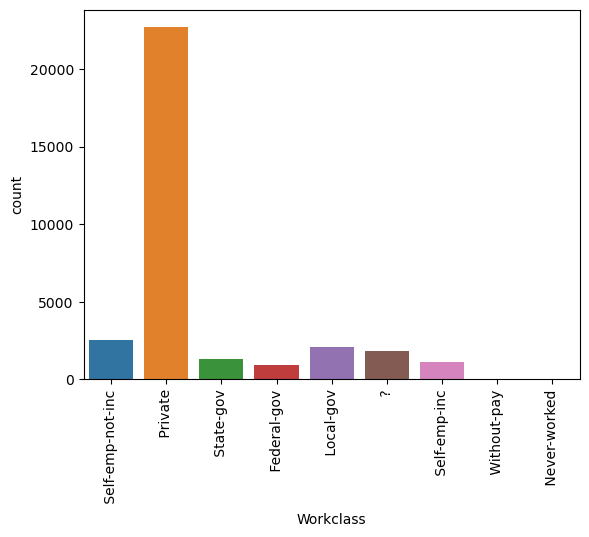

In [13]:
# Work class column:

sns.countplot(df['Workclass'])
plt.xticks(rotation = 90)

The majority of people belongs to private sector 

In [14]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

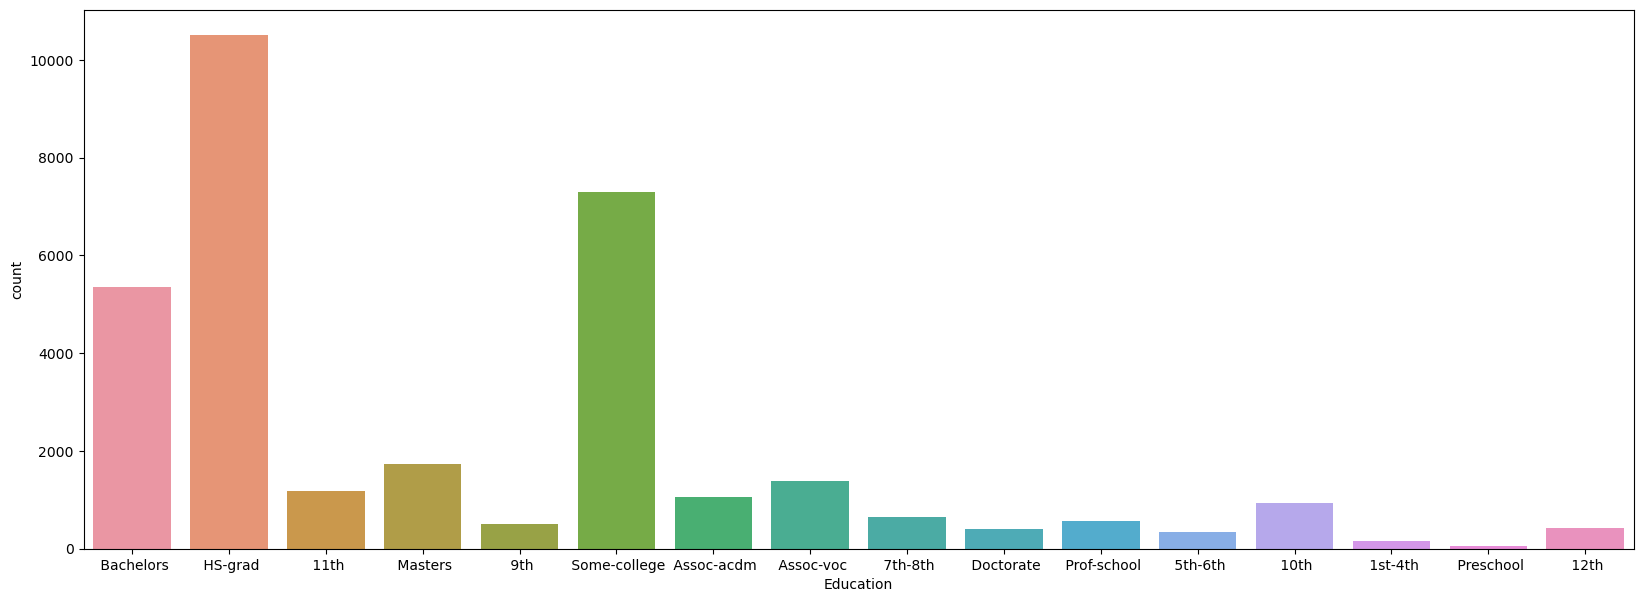

In [15]:
# Education column :

plt.figure(figsize = (20,7))
sns.countplot(df['Education'])

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Married-civ-spouse'),
  Text(1, 0, ' Divorced'),
  Text(2, 0, ' Married-spouse-absent'),
  Text(3, 0, ' Never-married'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

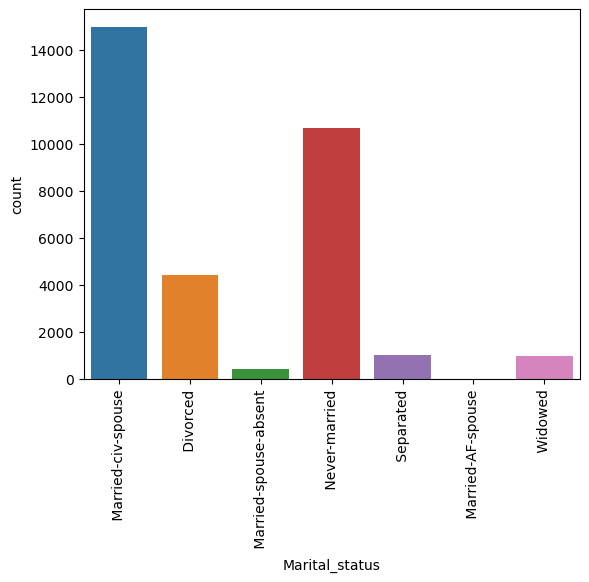

In [16]:
# Marital status column:

sns.countplot(df['Marital_status'])
plt.xticks(rotation = 90)

In [17]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In the Occupation columns we observe there 1843 is missing value which is represent ? symbol.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' ?'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Armed-Forces'),
  Text(14, 0, ' Priv-house-serv')])

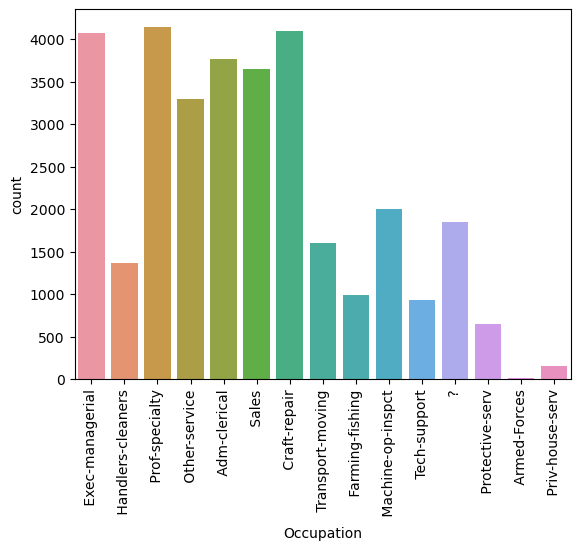

In [18]:
# Occupation column:

sns.countplot(df['Occupation'])
plt.xticks(rotation = 90)

In [19]:
df['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

<AxesSubplot:xlabel='Relationship', ylabel='count'>

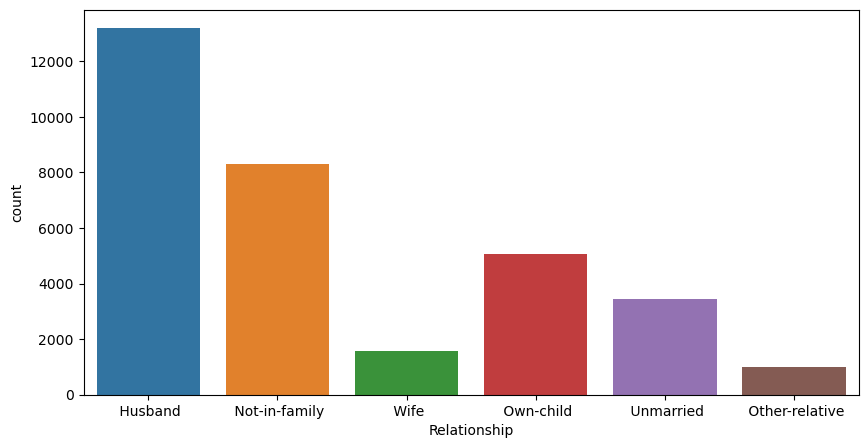

In [20]:
# Relationship column:

plt.figure(figsize = (10,5))
sns.countplot(df['Relationship'])

In [21]:
# Race column:

df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

<AxesSubplot:xlabel='Race', ylabel='count'>

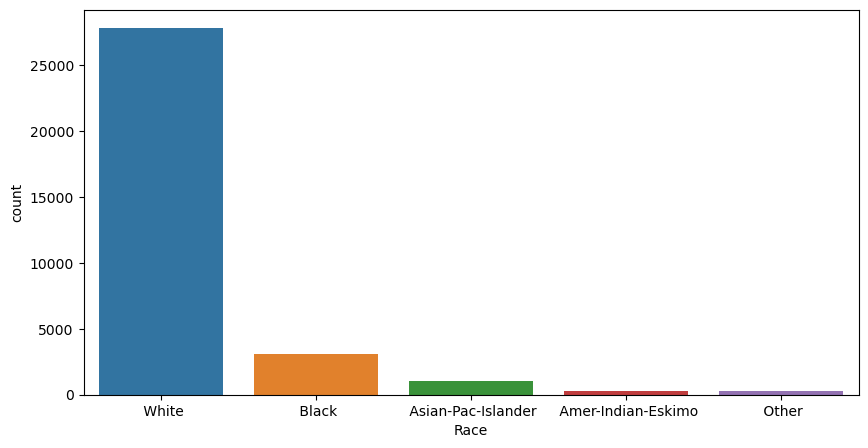

In [22]:
plt.figure(figsize = (10,5))
sns.countplot(df['Race'])

In [23]:
df['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

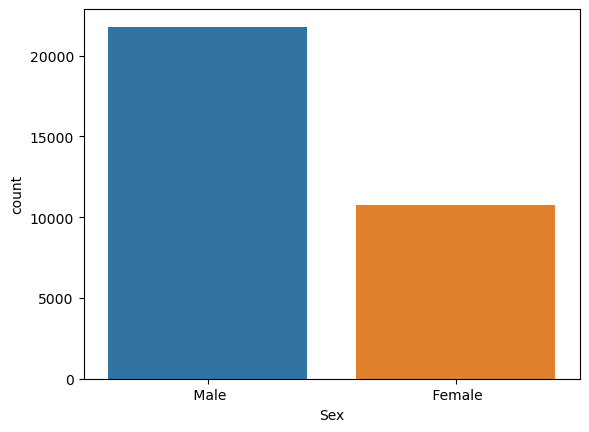

In [24]:
sns.countplot(df['Sex'])

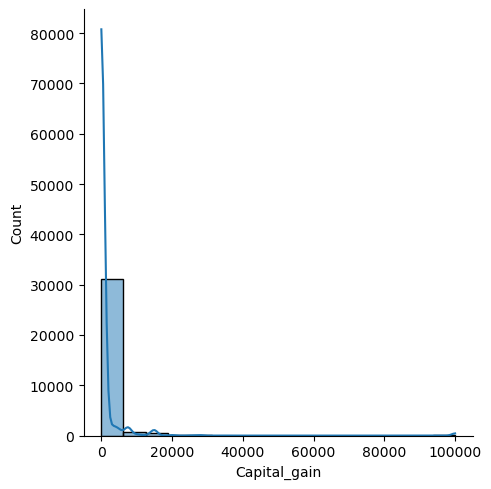

In [25]:
# Distribution plot :

sns.displot(df['Capital_gain'], kde = True)

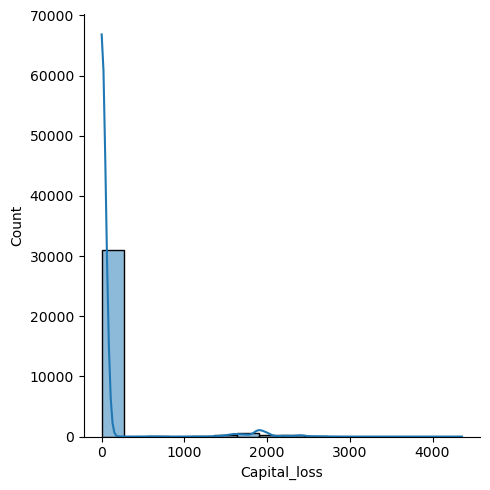

In [26]:
sns.displot(df['Capital_loss'], kde = True)

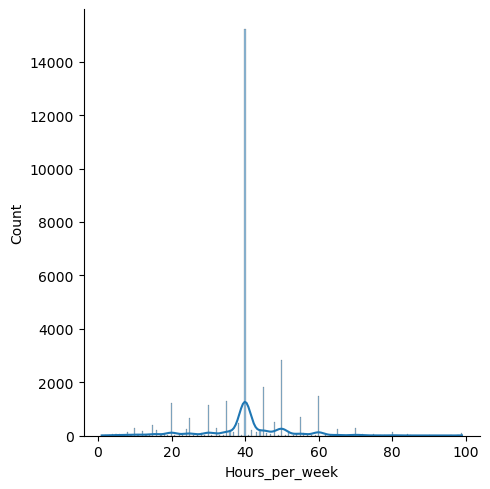

In [27]:
sns.displot(df['Hours_per_week'], kde = True)

In [28]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, ' United-States'),
  Text(1, 0, ' Cuba'),
  Text(2, 0, ' Jamaica'),
  Text(3, 0, ' India'),
  Text(4, 0, ' ?'),
  Text(5, 0, ' Mexico'),
  Text(6, 0, ' South'),
  Text(7, 0, ' Puerto-Rico'),
  Text(8, 0, ' Honduras'),
  Text(9, 0, ' England'),
  Text(10, 0, ' Canada'),
  Text(11, 0, ' Germany'),
  Text(12, 0, ' Iran'),
  Text(13, 0, ' Philippines'),
  Text(14, 0, ' Italy'),
  Text(15, 0, ' Poland'),
  Text(16, 0, ' Columbia'),
  Text(17, 0, ' Cambodia'),
  Text(18, 0, ' Thailand'),
  Text(19, 0, ' Ecuador'),
  Text(20, 0, ' Laos'),
  Text(21, 0, ' Taiwan'),
  Text(22, 0, ' Haiti'),
  Text(23, 0, ' Portugal'),
  Text(24, 0, ' Dominican-Republic'),
  Text(25, 0, ' El-Salvador'),
  Text(26, 0, ' France'),
  Text(27, 0, ' Guatemala'),
  Text(28, 0, ' China'),
  Text(29, 0, ' Japan'),
  

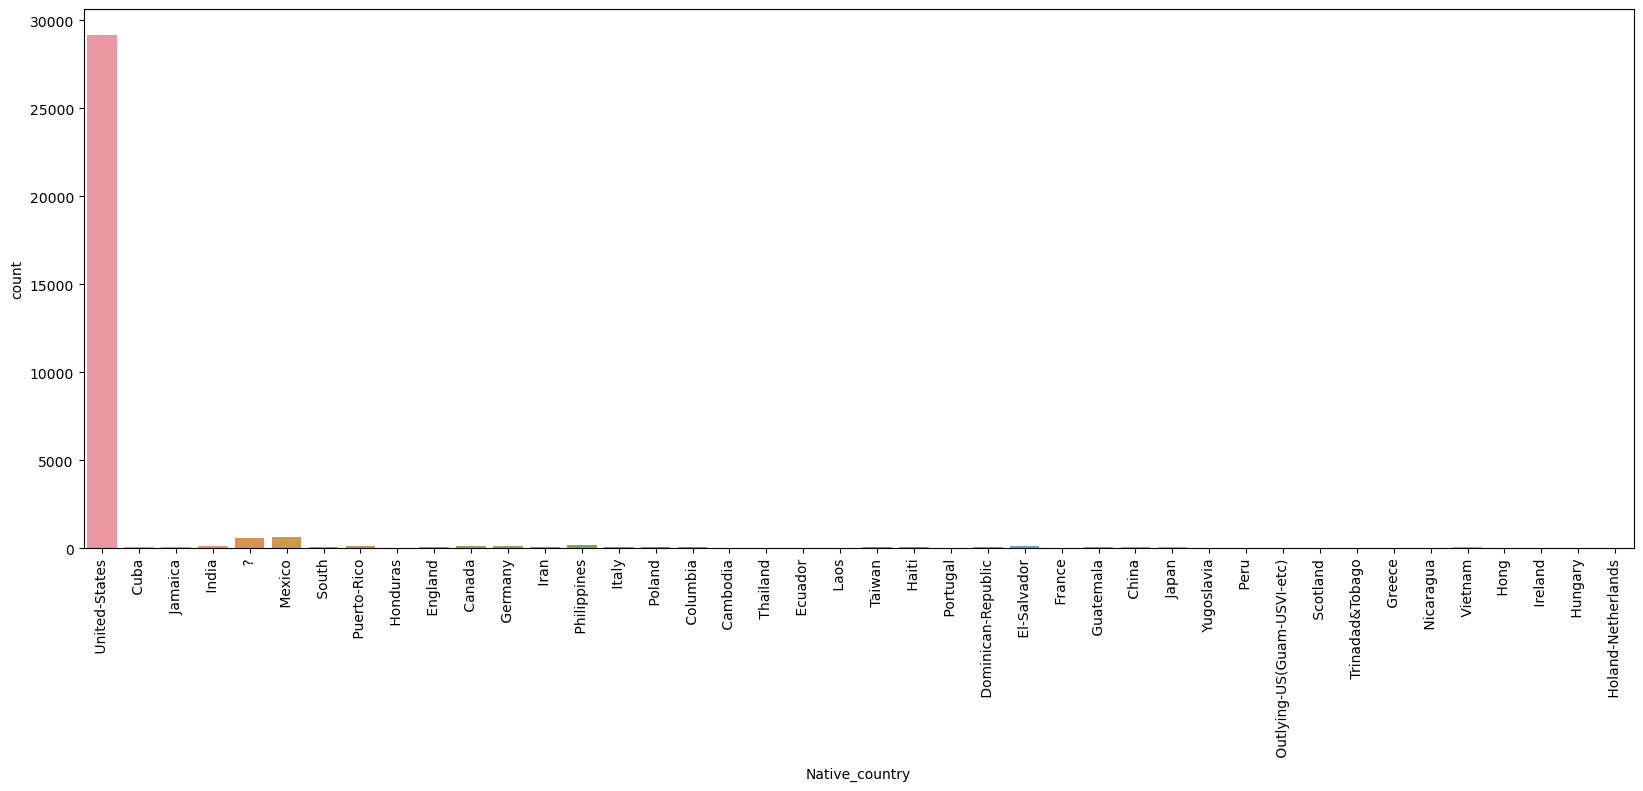

In [29]:
plt.figure(figsize = (20,7))
sns.countplot(df['Native_country'])
plt.xticks(rotation = 90)

In [30]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

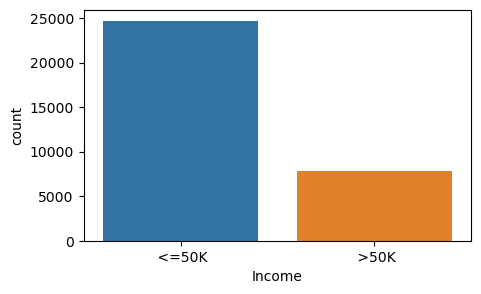

In [31]:
plt.figure(figsize = (5,3))
sns.countplot(df['Income'])

In [32]:
df_nominal = df[['Workclass', 'Race', 'Sex', 'Relationship','Income'].copy()]

In [33]:
df_nominal.columns

Index(['Workclass', 'Race', 'Sex', 'Relationship', 'Income'], dtype='object')

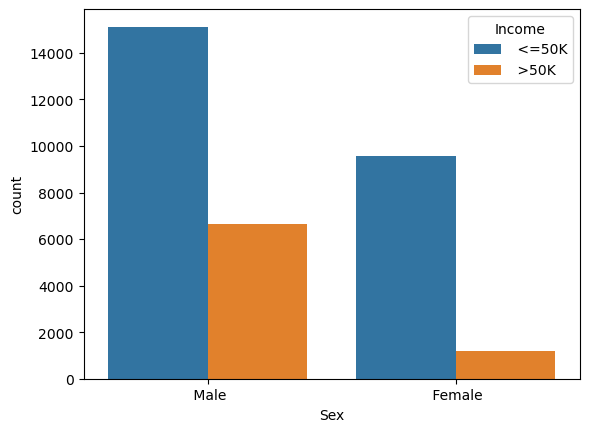

In [34]:
ax = sns.countplot(x = 'Sex', hue='Income', data=df_nominal)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, ' Self-emp-not-inc'),
  Text(1, 0, ' Private'),
  Text(2, 0, ' State-gov'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' ?'),
  Text(6, 0, ' Self-emp-inc'),
  Text(7, 0, ' Without-pay'),
  Text(8, 0, ' Never-worked')])

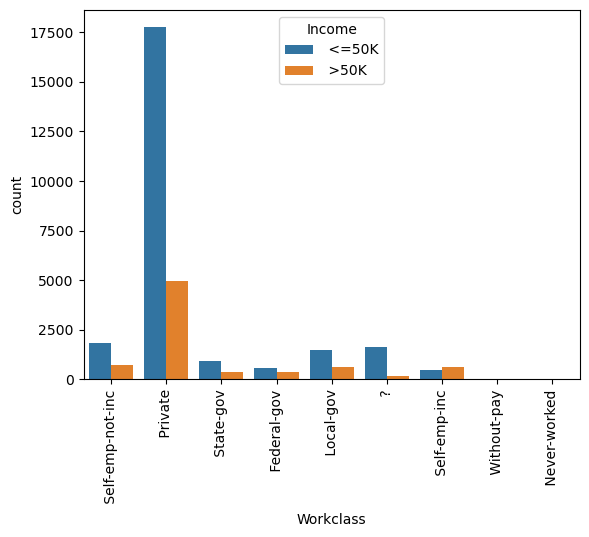

In [35]:
ax = sns.countplot(x = 'Workclass', hue = 'Income', data = df_nominal)
plt.xticks(rotation = 90)

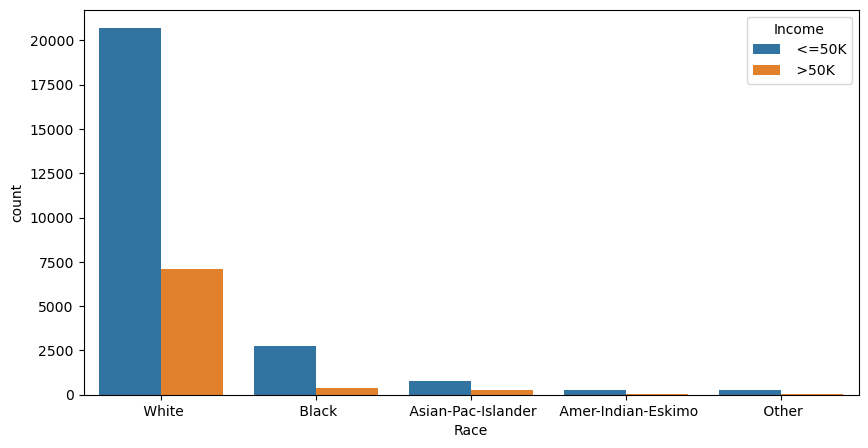

In [36]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x = 'Race', hue = 'Income', data = df_nominal)

<AxesSubplot:xlabel='Relationship', ylabel='count'>

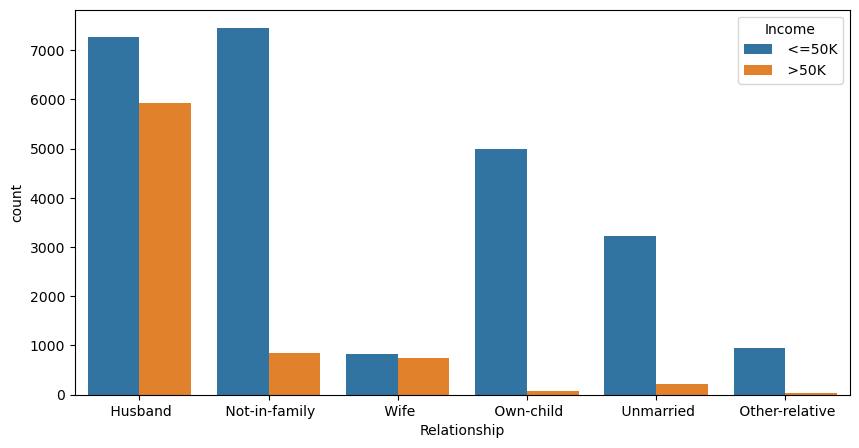

In [37]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Relationship', hue = 'Income', data = df_nominal)

In [38]:
df_ordinal = df[['Age', 'Education','Hours_per_week', 'Income'].copy()]

In [39]:
df_ordinal.columns

Index(['Age', 'Education', 'Hours_per_week', 'Income'], dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th')])

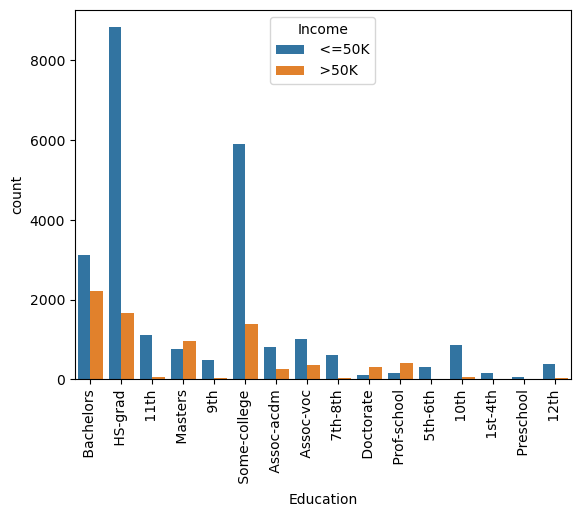

In [40]:
sns.countplot(x = 'Education', hue = 'Income', data = df_ordinal)
plt.xticks(rotation = 90)

<AxesSubplot:xlabel='Age', ylabel='count'>

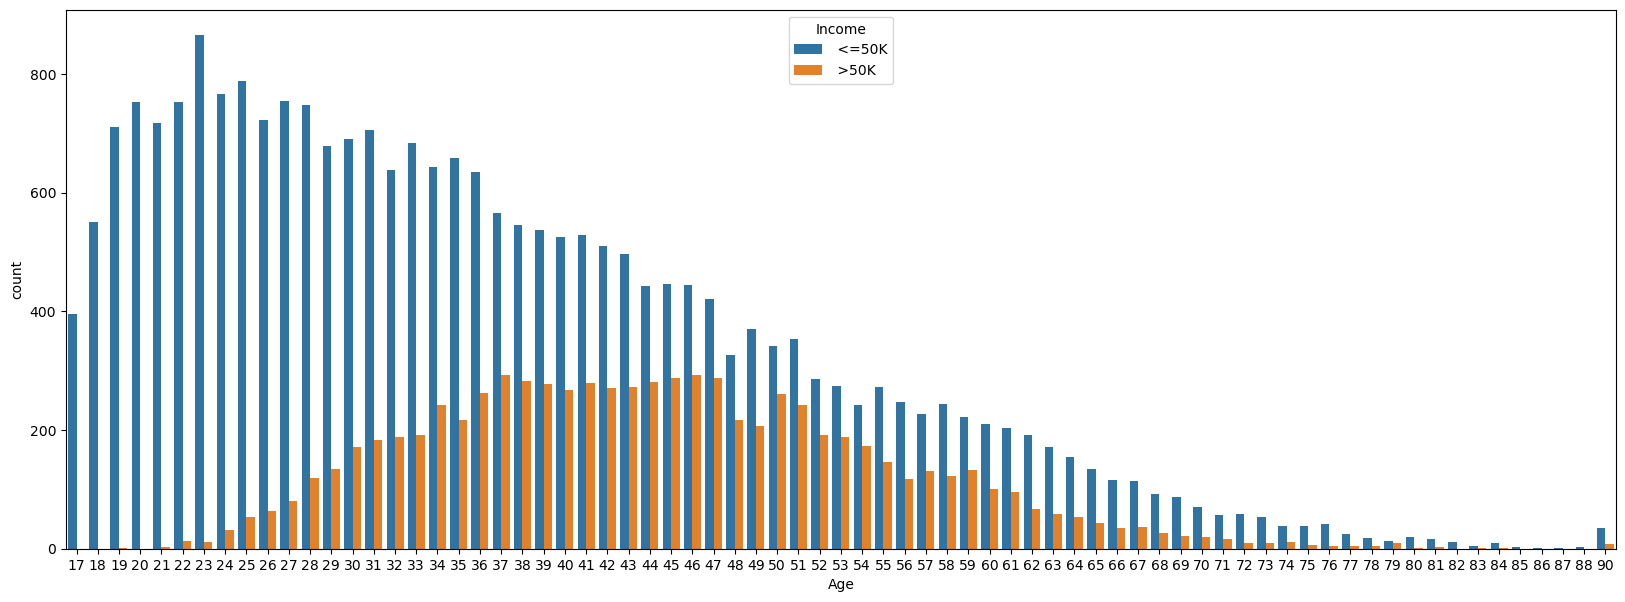

In [41]:
plt.figure(figsize = (20,7))
sns.countplot(x = 'Age', hue = 'Income', data = df_ordinal)

<AxesSubplot:xlabel='Age', ylabel='Hours_per_week'>

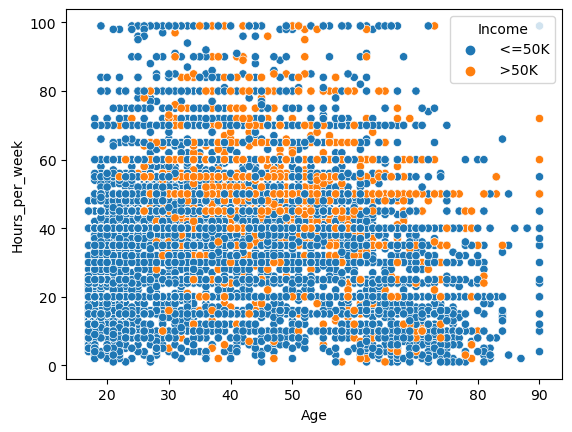

In [42]:
# checking the relationship between Age, Hours_per_week and Income using scatterplot :

sns.scatterplot(x = 'Age' , y='Hours_per_week', hue = 'Income',data=df_ordinal)

In [43]:
# Correlation : It is use only numerical value .

df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


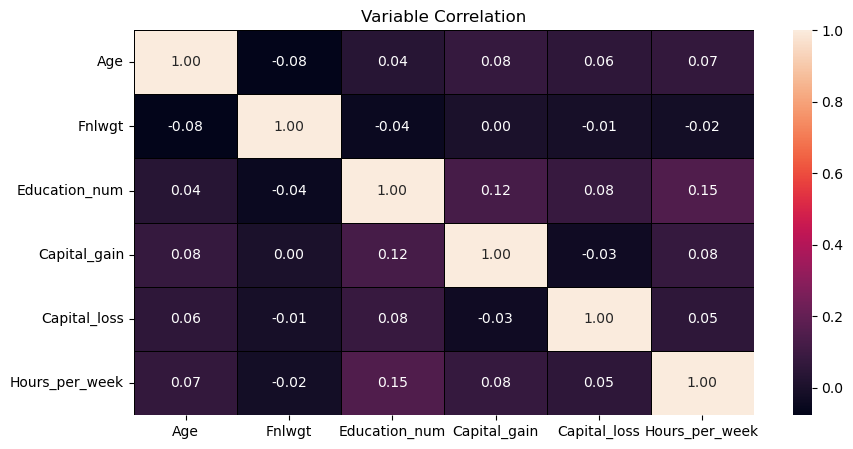

In [44]:
# Using Heatmap with correlation:

plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True, linewidth = 0.5, linecolor = 'black', fmt = '0.2f')
plt.title('Variable Correlation')
plt.show()

Data Modeling :

In [45]:
# Its a important part of my project we will fill the missing value as Workplace, occupation and NativeCountry column.
# we replace ‘?’ is ‘Workclass’ column by ‘Private’,
# ‘Occupation’ column by ‘Prof-speciality’ and 
#‘Native_country’ by ‘United-States’.


df['Workclass'] = df['Workclass'].replace('?', 'Private')
df['Occupation'] = df['Occupation'].replace('?', 'Prof-speciality')
df['Native_country'] = df['Native_country'].replace('?', 'United-States')

<AxesSubplot:>

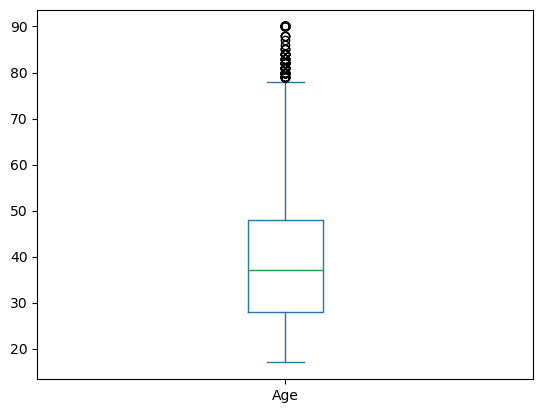

In [46]:
# Checking the Outliers for numeric columns:

df['Age'].plot.box()

<AxesSubplot:>

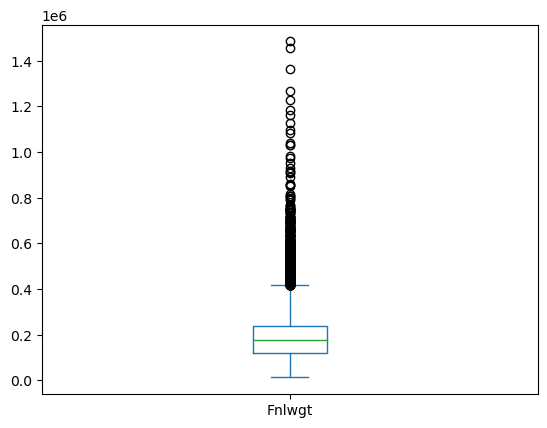

In [47]:
df['Fnlwgt'].plot.box()

<AxesSubplot:>

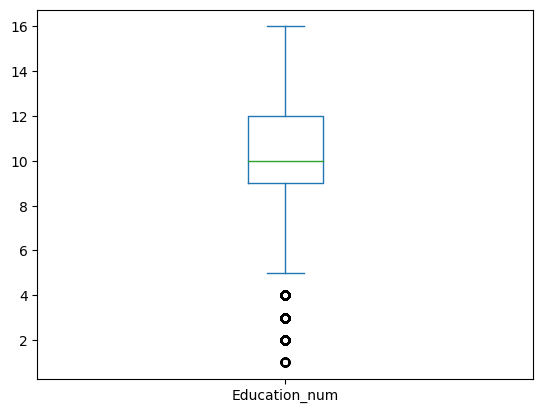

In [48]:
df['Education_num'].plot.box()

<AxesSubplot:>

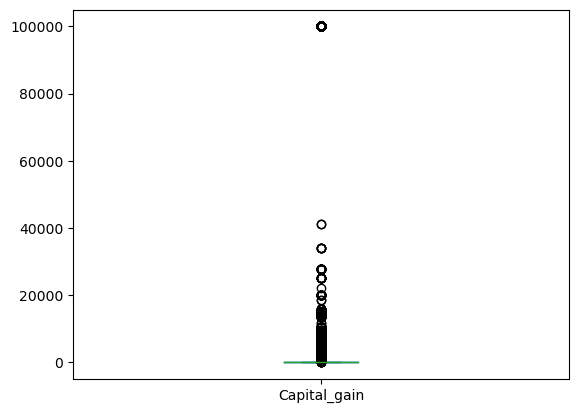

In [49]:
df['Capital_gain'].plot.box()

<AxesSubplot:>

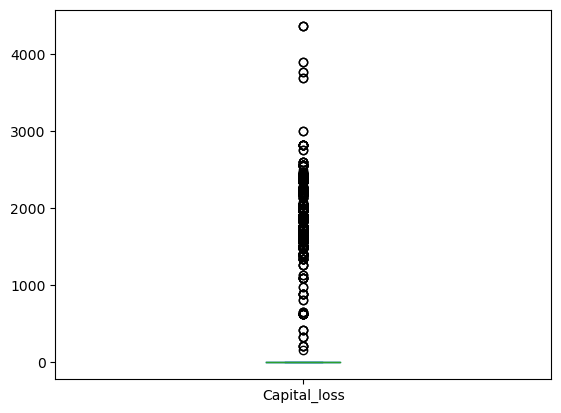

In [50]:
df['Capital_loss'].plot.box()

<AxesSubplot:>

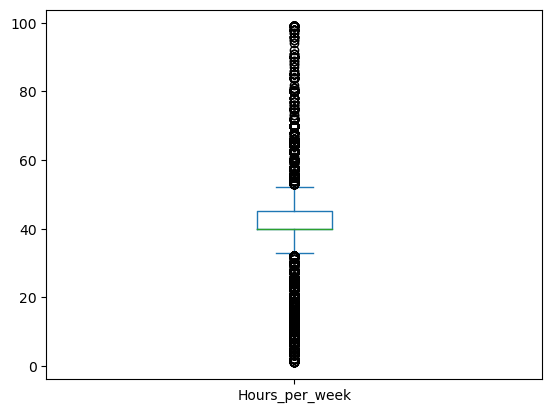

In [51]:
df['Hours_per_week'].plot.box()

In [52]:
# Use LabelEncoder Method for converting the object column to numerical column :

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['Workclass'] = LE.fit_transform(df['Workclass'])
df['Education'] = LE.fit_transform(df['Education'])
df['Marital_status'] = LE.fit_transform(df['Marital_status'])
df['Occupation'] = LE.fit_transform(df['Occupation'])
df['Relationship'] = LE.fit_transform(df['Relationship'])
df['Race'] = LE.fit_transform(df['Race'])
df['Sex'] = LE.fit_transform(df['Sex'])
df['Native_country'] = LE.fit_transform(df['Native_country'])
df['Income'] = LE.fit_transform(df['Income'])


In [53]:
df['Workclass'].value_counts()

4    22696
6     2541
2     2093
0     1836
7     1297
5     1116
1      960
8       14
3        7
Name: Workclass, dtype: int64

In [54]:
df['Education'].value_counts()

11    10501
15     7291
9      5354
12     1723
8      1382
1      1175
7      1067
0       933
5       646
14      576
6       514
2       433
10      413
4       333
3       168
13       51
Name: Education, dtype: int64

In [55]:
df['Marital_status'].value_counts()

2    14976
4    10682
0     4443
5     1025
6      993
3      418
1       23
Name: Marital_status, dtype: int64

In [56]:
df['Occupation'].value_counts()

10    4140
3     4099
4     4066
1     3769
12    3650
8     3295
7     2002
0     1843
14    1597
6     1370
5      994
13     928
11     649
9      149
2        9
Name: Occupation, dtype: int64

In [57]:
df['Relationship'].value_counts()

0    13193
1     8304
3     5068
4     3446
5     1568
2      981
Name: Relationship, dtype: int64

In [58]:
df['Race'].value_counts()

4    27815
2     3124
1     1039
0      311
3      271
Name: Race, dtype: int64

In [59]:
df['Sex'].value_counts()

1    21789
0    10771
Name: Sex, dtype: int64

In [60]:
df['Native_country'].value_counts()

39    29169
26      643
0       583
30      198
11      137
2       121
33      114
8       106
19      100
5        95
9        90
23       81
35       80
3        75
22       73
6        70
40       67
13       64
24       62
31       60
4        59
36       51
14       44
20       43
32       37
27       34
29       31
10       29
12       29
7        28
21       24
17       20
1        19
38       19
25       18
37       18
41       16
28       14
16       13
18       13
34       12
15        1
Name: Native_country, dtype: int64

In [61]:
df['Income'].value_counts()

0    24719
1     7841
Name: Income, dtype: int64

In [62]:
# Checking skewness...
df.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

In [63]:
# Splitting the independent variable and dependent variable(target) in x and y before removing the skewness :

x = df.drop('Income', axis = 1)
y = df['Income']

In [64]:
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39


In [65]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 32560, dtype: int32

In [66]:
len(x)

32560

In [67]:
len(y)

32560

In [68]:
x.skew().sort_values()

Native_country    -3.658235
Race              -2.435332
Education         -0.934063
Workclass         -0.752280
Sex               -0.719244
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Hours_per_week     0.227636
Age                0.558738
Relationship       0.786784
Fnlwgt             1.446972
Capital_loss       4.594549
Capital_gain      11.953690
dtype: float64

In [69]:
# We can see skewness is most of the columns in dataset, we will remove skewness using power_transform function :

from sklearn.preprocessing import power_transform, PowerTransformer

pt = PowerTransformer()
x_new_pt = pt.fit_transform(x)
x_new_pt

array([[ 0.89194656,  1.64422286, -1.08988899, ..., -0.2212132 ,
        -2.22151541,  0.32907402],
       [ 0.10271741,  0.01186427,  0.39874263, ..., -0.2212132 ,
        -0.03557001,  0.32907402],
       [ 1.06438077,  0.01186427,  0.56254016, ..., -0.2212132 ,
        -0.03557001,  0.32907402],
       ...,
       [ 1.33455599,  0.01186427, -0.2197547 , ..., -0.2212132 ,
        -0.03557001,  0.32907402],
       [-1.35834147,  0.01186427,  0.27166793, ..., -0.2212132 ,
        -1.65499204,  0.32907402],
       [ 1.00782289,  0.79430139,  0.98216482, ..., -0.2212132 ,
        -0.03557001,  0.32907402]])

In [70]:
# numpy array :

x_new = power_transform(x)
x_new

array([[ 0.89194656,  1.64422286, -1.08988899, ..., -0.2212132 ,
        -2.22151541,  0.32907402],
       [ 0.10271741,  0.01186427,  0.39874263, ..., -0.2212132 ,
        -0.03557001,  0.32907402],
       [ 1.06438077,  0.01186427,  0.56254016, ..., -0.2212132 ,
        -0.03557001,  0.32907402],
       ...,
       [ 1.33455599,  0.01186427, -0.2197547 , ..., -0.2212132 ,
        -0.03557001,  0.32907402],
       [-1.35834147,  0.01186427,  0.27166793, ..., -0.2212132 ,
        -1.65499204,  0.32907402],
       [ 1.00782289,  0.79430139,  0.98216482, ..., -0.2212132 ,
        -0.03557001,  0.32907402]])

In [71]:
# transform II(x)
# transform III(X)

# checking skewness :

pd.DataFrame(x_new, columns = x.columns).skew().sort_values(ascending = False)

Capital_loss      4.299511
Capital_gain      3.016951
Hours_per_week    0.229556
Relationship      0.122917
Workclass         0.061629
Education_num     0.023885
Fnlwgt            0.016914
Age              -0.013897
Marital_status   -0.114201
Occupation       -0.187152
Education        -0.309431
Sex              -0.719244
Race             -2.010817
Native_country   -2.725467
dtype: float64

In [72]:
y.value_counts()

0    24719
1     7841
Name: Income, dtype: int64

In [73]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [74]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y = SM.fit_resample(x,y)

In [75]:
y.value_counts()

0    24719
1    24719
Name: Income, dtype: int64

In [76]:
# Removing Outliers :

x = df.iloc[ : , : -1]   # considering all rows and target variable
y = df.iloc[ : , -1]

In [77]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(x))
z.shape

(32560, 14)

In [78]:
threshold=3
print(np.where(z>3))

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64), array([13, 12,  8, ...,  8,  8,  8], dtype=int64))


In [79]:
x = x[(z<3).all(axis=1)]   # outlier removal
print(df.shape)
print(x.shape)
#x.shape

(32560, 15)
(27417, 14)


In [80]:
y=y[(z<3).all(axis=1)]

In [81]:
y.shape

(27417,)

In [82]:
# Percentage data loss :

loss_percentage = (32560-27417)/32560*100
print(loss_percentage)

15.795454545454547


In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

In [84]:
for i in range (0,1000):
    x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = i, test_size = 0.20)
    
    LR.fit(x_train, y_train)
    pred_train = LR.predict(x_train)
    pred_test = LR.predict(x_test)
    if round (accuracy_score (y_train, pred_train)* 100,1) == round(accuracy_score(y_test, pred_test)* 100,1):
        print("At random state", i, "The model performance very well")
        print("At random_state :-", i)
        print("Training accuracy is :-", accuracy_score(y_train, pred_train)* 100)
        print("Testing accuracy is :-", accuracy_score(y_test, pred_test)* 100)

At random state 4 The model performance very well
At random_state :- 4
Training accuracy is :- 80.23526193407194
Testing accuracy is :- 80.16046681254558
At random state 7 The model performance very well
At random_state :- 7
Training accuracy is :- 80.04376966215293
Testing accuracy is :- 79.9963530269876
At random state 31 The model performance very well
At random_state :- 31
Training accuracy is :- 80.17143117676561
Testing accuracy is :- 80.17870167760759
At random state 55 The model performance very well
At random_state :- 55
Training accuracy is :- 80.05288834176811
Testing accuracy is :- 80.10576221735958
At random state 67 The model performance very well
At random_state :- 67
Training accuracy is :- 80.19422787580358
Testing accuracy is :- 80.17870167760759
At random state 106 The model performance very well
At random_state :- 106
Training accuracy is :- 80.18054985638081
Testing accuracy is :- 80.21517140773157
At random state 113 The model performance very well
At random_state

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 899)

In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85      4254
           1       0.24      0.08      0.12      1230

    accuracy                           0.74      5484
   macro avg       0.51      0.50      0.48      5484
weighted avg       0.66      0.74      0.68      5484



In [87]:
# cross validation score for logistic regression :

pred_LR = LR.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test,pred_LR)
for j in range(2,10):
    lsscore = cross_val_score(LR,x,y,cv=j)
    lsc = lsscore.mean()
    print("At cv:-",j)
    print("Cross validation score is:-",lsc*100)
    print("accuarcy_score is:-",lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 80.19477629376786
accuarcy_score is:- 80.39752005835157


At cv:- 3
Cross validation score is:- 80.31148557464348
accuarcy_score is:- 80.39752005835157


At cv:- 4
Cross validation score is:- 80.05251343165155
accuarcy_score is:- 80.39752005835157


At cv:- 5
Cross validation score is:- 80.22759825376309
accuarcy_score is:- 80.39752005835157


At cv:- 6
Cross validation score is:- 80.16560641841708
accuarcy_score is:- 80.39752005835157


At cv:- 7
Cross validation score is:- 80.1838368680397
accuarcy_score is:- 80.39752005835157


At cv:- 8
Cross validation score is:- 80.09993355326753
accuarcy_score is:- 80.39752005835157


At cv:- 9
Cross validation score is:- 80.07077849375614
accuarcy_score is:- 80.39752005835157




In [88]:
# DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
pred_train_dtc = dt.predict(x_train)
print("Testing Accuracy", accuracy_score(y_test, preddt)*100)    #testing accuracy
print("Training Accuracy", accuracy_score(y_train, pred_train_dtc)*100)     # training accuracy
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test, preddt))

Testing Accuracy 81.09044493070752
Training Accuracy 100.0
[[3718  536]
 [ 501  729]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      4254
           1       0.58      0.59      0.58      1230

    accuracy                           0.81      5484
   macro avg       0.73      0.73      0.73      5484
weighted avg       0.81      0.81      0.81      5484



In [89]:
# checking Cross validation score for DecisionTreeClassifier :

score = cross_val_score(dt, x, y)
print(score)
print(score.mean())
print("Diff b/w Accuracy Score and Cross Validation score is :-", accuracy_score(y_test, preddt) - score.mean())

[0.80561634 0.8043399  0.8053985  0.80758709 0.80631041]
0.8058504484320144
Diff b/w Accuracy Score and Cross Validation score is :- 0.0050540008750608045


In [90]:
# RandomForestClassier :

from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.8579504011670314
[[3963  291]
 [ 488  742]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4254
           1       0.72      0.60      0.66      1230

    accuracy                           0.86      5484
   macro avg       0.80      0.77      0.78      5484
weighted avg       0.85      0.86      0.85      5484



In [91]:
# checking cross validation score for RandomForestClassifier :

score = cross_val_score(RFC, x, y)
print(score)
print(score.mean())
print("Diff b/w Accuracy Score and Cross validation score is :-", accuracy_score(y_test, predRFC) - score.mean())

[0.8512035  0.84828592 0.85117636 0.8588364  0.85464162]
0.8528287620126289
Diff b/w Accuracy Score and Cross validation score is :- 0.0051216391544024464


In [92]:
# Supportvectormachine :

from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.8085339168490153
[[4248    6]
 [1044  186]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      4254
           1       0.97      0.15      0.26      1230

    accuracy                           0.81      5484
   macro avg       0.89      0.57      0.58      5484
weighted avg       0.84      0.81      0.75      5484



In [93]:
# checking cross validation score for SupportvectorMachine :

score = cross_val_score(svc, x, y)
print(score)
print(score.mean())
print("Diff b/w Accuracy Score and Cross validation score is :-", accuracy_score(y_test, predsvc) - score.mean())

[0.80926331 0.80616338 0.80795185 0.80831661 0.80776947]
0.8078929262558511
Diff b/w Accuracy Score and Cross validation score is :- 0.0006409905931642479


In [94]:
# Gradient Boosting Classifier:

from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(x_train, y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

0.863420860685631
[[4013  241]
 [ 508  722]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4254
           1       0.75      0.59      0.66      1230

    accuracy                           0.86      5484
   macro avg       0.82      0.77      0.79      5484
weighted avg       0.86      0.86      0.86      5484



In [95]:
# checking cross validation score for GradientBoostingClassifier :

score = cross_val_score(GB, x, y)
print(score)
print(score.mean())
print("Diff b/w Accuracy Score and Cross validation score is :-", accuracy_score(y_test, predGB) - score.mean())

[0.85940919 0.86287381 0.8639431  0.87032646 0.86248404]
0.863807321429688
Diff b/w Accuracy Score and Cross validation score is :- -0.0003864607440570156


In [96]:
# ExtraTreesClassifier:

from sklearn.ensemble import ExtraTreesClassifier
ET = ExtraTreesClassifier()
ET.fit(x_train, y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.8479212253829321
[[3915  339]
 [ 495  735]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      4254
           1       0.68      0.60      0.64      1230

    accuracy                           0.85      5484
   macro avg       0.79      0.76      0.77      5484
weighted avg       0.84      0.85      0.84      5484



In [97]:
# checking cross validation score for ExtraTreesClassifier :

score = cross_val_score(ET, x, y)
print(score)
print(score.mean())
print("Diff b/w Accuracy Score and Cross validation score is :-", accuracy_score(y_test, predET) - score.mean())

[0.84336251 0.84299781 0.84333394 0.84935254 0.844793  ]
0.8447679605938013
Diff b/w Accuracy Score and Cross validation score is :- 0.003153264789130805


In [98]:
# Hyper Parameter Tunning :

from sklearn.model_selection import GridSearchCV

In [99]:
parameters = {'criterion': ['gini', 'entropy'],
             'random_state' : [10,50,1000],
             'max_depth' : [0,10,20],
             'n_jobs' : [-2,-1,1],
             'n_estimators' : [50,100,200,300]}

In [100]:
GCV =GridSearchCV(ExtraTreesClassifier(), parameters, cv=5)

In [ ]:
GCV.fit(x_train,y_train)

In [ ]:
GCV.best_params_

In [ ]:
final_model = ExtraTreesClassifier(criterion = 'gini', max_depth = 20, n_estimators = 300, n_jobs = -2, random_state = 10)
final_model.fit(x_train,y_train)
pred = final_model.predict(x_train)
acc = accuracy_score(y_train, pred)
print(acc*100)

In [ ]:
# AUC-RUC Curve :

from sklearn.metrics import roc_curve, auc
fpr,tpr,thresholds = roc_curve(pred_test, y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=10, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color = 'navy', lw=10, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve,auc

In [ ]:
disp = plot_roc_curve(ET, x_test, y_test)  #ax_ = Axes with confusion matrix
plot_roc_curve(RFC, x_test, y_test, ax = disp.ax_)

plot_roc_curve(svc, x_test, y_test, ax = disp.ax_)
plot_roc_curve(GB, x_test, y_test, ax = disp.ax_)
plot_roc_curve(dt, x_test, y_test, ax = disp.ax_)

plt.legend(prop = {'size' :11}, loc = 'lower right')
plt.show()

In [ ]:
# Model Saving :

import pickle
filename = 'Census_Income.pkl'
pickle.dump(LR, open(filename, 'wb'))

In [ ]:
# Conclusion :

import numpy as np
a = np.array(y_test)
predicted = np.array(LR.predict(x_test))
df_com = pd.DataFrame({"Orignal" : a, "predicted" : predicted}, index = range(len(a)))

In [ ]:
df_com